In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14,8)

import geopandas as gp
import rasterio as rio
import rasterio.plot as rplot

In [2]:
mercury_hokusai = rio.open('global/Mercury_hokusai.tif', 'r')

In [3]:
mercury_hokusai.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 0.0,
 'width': 9938,
 'height': 3783,
 'count': 3,
 'crs': CRS.from_wkt('PROJCS["SimpleCylindrical Mercury",GEOGCS["GCS_Mercury",DATUM["D_Mercury",SPHEROID["Mercury",2439400,0]],PRIMEM["Reference_Meridian",0],UNIT["degree",0.0174532925199433]],PROJECTION["Equirectangular"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",0],PARAMETER["standard_parallel_1",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]'),
 'transform': Affine(665.24315271, 0.0, -1389593.973776186,
        0.0, -665.24315271, 3014590.184478968)}

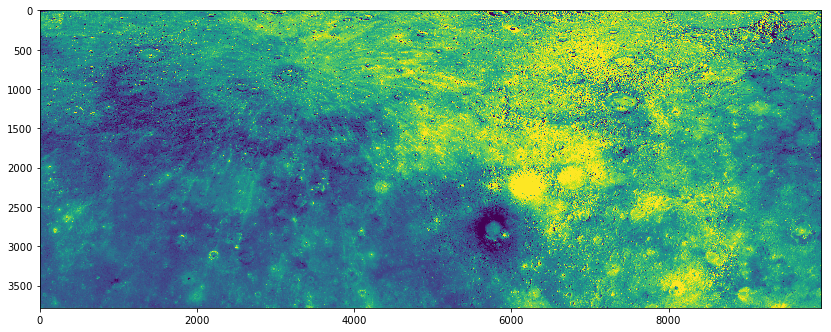

In [60]:
plt.imshow(mercury_hokusai.read(1))

In [12]:
mercury_hokusai.nodata

0.0

In [15]:
import numpy as np
from rasterio.warp import calculate_default_transform, reproject, Resampling

PROJ_MERCURY_MERCATOR = '+proj=merc +a=2439700 +b=2439700 +lat_ts=0.0 +lon_0=0.0 +x_0=0.0 +y_0=0 +k=1.0 +units=m +nadgrids=@null +wktext  +no_defs'

transform, width, height = calculate_default_transform(mercury_hokusai.crs, PROJ_MERCURY_MERCATOR, 
                                                       mercury_hokusai.width, mercury_hokusai.height, 
                                                       *mercury_hokusai.bounds)

source = mercury_hokusai.read(1)
destination = np.zeros((height,width))

src_transform = mercury_hokusai.transform
src_crs = mercury_hokusai.crs
src_nodata = mercury_hokusai.nodata
dst_transform = transform
dst_crs = PROJ_MERCURY_MERCATOR
dst_nodata = 0

reproject(source, destination, 
          src_transform=src_transform, src_crs=src_crs, src_nodata=src_nodata, 
          dst_transform=dst_transform, dst_crs=dst_crs, dst_nodata=dst_nodata, 
          resampling=Resampling.nearest)

In [45]:
mercury_hokusai_mercator = rio.open('global/Mercury_hokusai_mercator.tif', 'w', driver='GTiff',
                                    height=height, width=width, transform=transform, 
                                    dtype=str(destination.dtype), count=1, 
                                    crs=PROJ_MERCURY_MERCATOR)
mercury_hokusai_mercator.write(destination, 1)
mercury_hokusai_mercator.close()

In [46]:
mercury_hokusai_mercator = rio.open('global/Mercury_hokusai_mercator.tif')

In [64]:
contacts = gp.read_file('D2.2/Shapefiles/H05_contacts/H05_contacts-MERCATOR.shp')

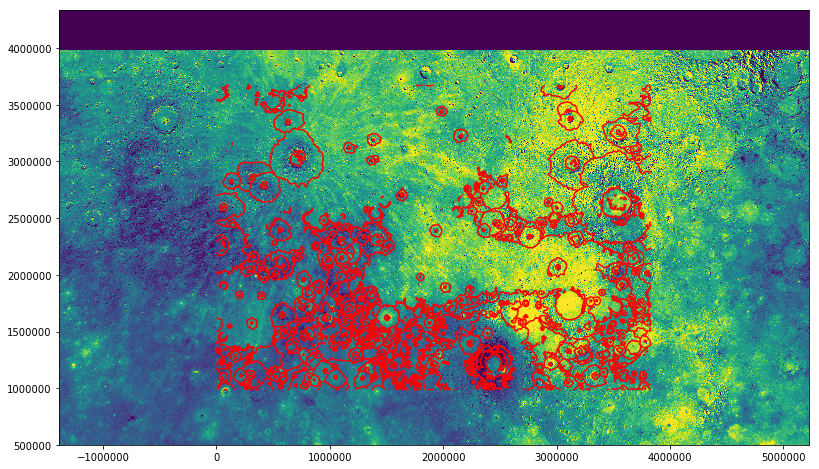

In [65]:
fig,ax = plt.subplots(figsize=(14,8))
rplot.show(mercury_hokusai_mercator, ax=ax)
contacts.plot(ax=ax, facecolor='none', edgecolor='red')

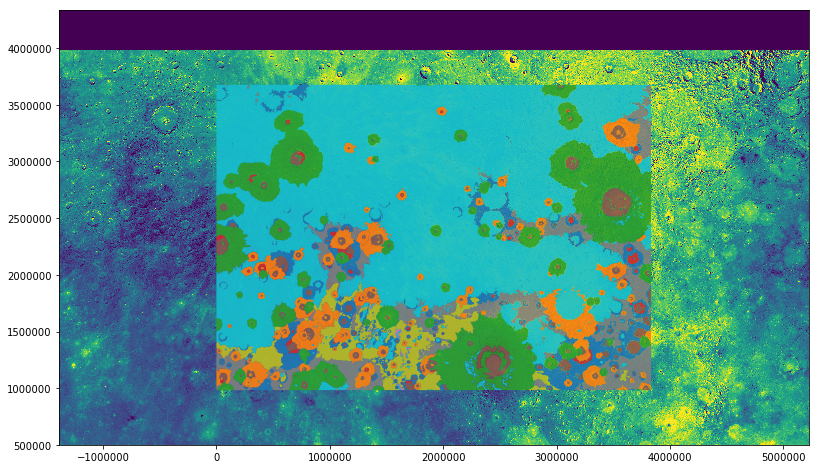

In [72]:
geounits = gp.read_file('D2.2/Shapefiles/H05_geological_units/3_classes/H05_geological_units_3_classes-MERCATOR.shp')

fig,ax = plt.subplots(figsize=(14,8))
rplot.show(mercury_hokusai_mercator, ax=ax)
geounits.plot(ax=ax, column='Geological', cmap='tab10', alpha=0.9)

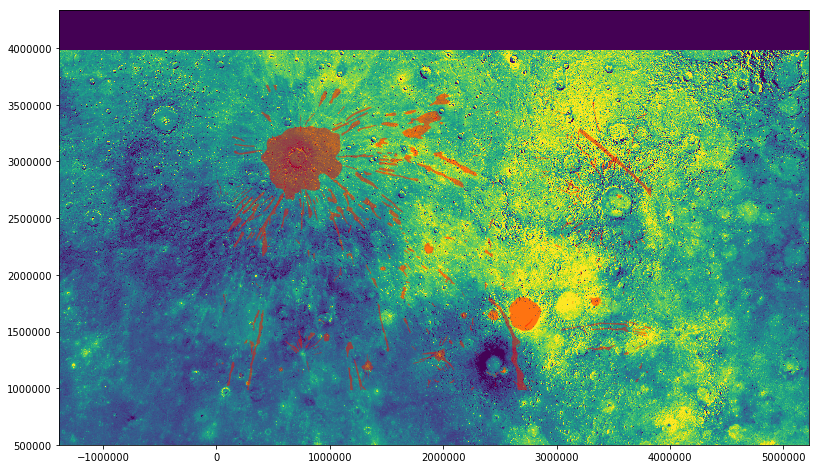

In [77]:
surf = gp.read_file('D2.2/Shapefiles/H05_surface_features/H05_surface_features-MERCATOR.shp')

fig,ax = plt.subplots(figsize=(14,8))
rplot.show(mercury_hokusai_mercator, ax=ax)
surf.plot(ax=ax, facecolor='red', alpha=0.5)